# Preprocessing Data
 

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
import pyreadstat

# Read the sas7bdat file
df, meta = pyreadstat.read_sas7bdat('data/riskydr00_11.sas7bdat')
df.shape

(380, 17)

In [3]:
df.dtypes.value_counts()

float64    17
dtype: int64

In [4]:
df.head()

,sustr_uk,weight,gn,agegr3,edu,oneprhouse,ecactiv,psydsord,chrodse,prhealth,psydist,BDI3,sensecoh,ageatfdr,familyhist,smoking,phyact4
0,0.0,1.086293,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,65.0,17.0,1.0,1.0,4.0
1,1.0,1.086293,1.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,73.0,19.0,0.0,0.0,3.0
2,1.0,1.086293,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,59.0,18.0,0.0,1.0,3.0
3,0.0,1.086293,1.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,64.0,17.0,0.0,0.0,4.0
4,1.0,0.945237,2.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,58.0,15.0,0.0,0.0,3.0


### Chi-square test

In [5]:
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/
from scipy import stats

# To get row proportions, pass ‘Row’ into the “prop= ” argument for the function
# To get col proportions, pass ‘Col’ into the “prop= ”
# like, prop= 'Row'
# else it is False.


def chi2_table(series1, series2, to_csv = False, csv_name = None, prop= 'Row'):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

# EDA and Preprocessing

Variable selection here is a design choice and I only focused on those that would be usefull for my models. 

## sustr_uk (target)

In [6]:
# distribution of cannabis use

df['target'] = df['sustr_uk']

print(df[['target']].value_counts(dropna= False))

print('\n --------------')
print(df[['target']].value_counts(dropna= False, normalize=True))

target
0.0       195
1.0       185
dtype: int64

 --------------
target
0.0       0.513158
1.0       0.486842
dtype: float64


## Weight 

In [7]:
# Continius
df['weight'].describe()

count    380.000000
mean       1.061205
std        0.066691
min        0.894603
25%        1.015347
50%        1.068462
75%        1.108923
max        1.236259
Name: weight, dtype: float64

## (k1) - gender 

In [8]:
# binary
# gender
print(df['gn'].value_counts(dropna=False, normalize=True))


df['gender'] = df['gn']
print(df['gender'].value_counts(dropna=False))

1.0    0.655263
2.0    0.344737
Name: gn, dtype: float64
1.0    249
2.0    131
Name: gender, dtype: int64


In [9]:
chi2_table(df['gender'], df['target'])



 Chi-Square test between gender and target 
 
 target    0.0    1.0    All
gender                     
1.0     48.59  51.41  100.0
2.0     56.49  43.51  100.0
All     51.32  48.68  100.0 
 
 Pearson Chi2(1)= 1.8369 p-value= 0.1753


## (k2) age

In [10]:
# categoric 
# 30-44
# 45-59
# 60+

df['age'] = df['agegr3']

print(df['age'].value_counts(dropna=False, normalize=True))

print('--------------- \n')
print(df['age'].value_counts(dropna= False))

2.0    0.468421
1.0    0.389474
3.0    0.142105
Name: age, dtype: float64
--------------- 

2.0    178
1.0    148
3.0     54
Name: age, dtype: int64


In [11]:
chi2_table(df['age'], df['target'])


 Chi-Square test between age and target 
 
 target    0.0    1.0    All
age                        
1.0     45.27  54.73  100.0
2.0     47.75  52.25  100.0
3.0     79.63  20.37  100.0
All     51.32  48.68  100.0 
 
 Pearson Chi2(2)= 20.3978 p-value= 0.0000


## Edu 

In [12]:
# categoric

# lowest
# middle
# highest

print(df['edu'].value_counts(dropna=False, normalize=True))

print('--------------- \n')
print(df['edu'].value_counts(dropna= False))

2.0    0.394737
3.0    0.334211
1.0    0.265789
NaN    0.005263
Name: edu, dtype: float64
--------------- 

2.0    150
3.0    127
1.0    101
NaN      2
Name: edu, dtype: int64


In [13]:
chi2_table(df['edu'], df['target'])


 Chi-Square test between edu and target 
 
 target    0.0    1.0    All
edu                        
1.0     60.40  39.60  100.0
2.0     50.00  50.00  100.0
3.0     44.88  55.12  100.0
All     51.06  48.94  100.0 
 
 Pearson Chi2(2)= 5.5302 p-value= 0.0630


## (k5)- household members

In [14]:
# binary

df['household'] = df['oneprhouse']

print(df['household'].value_counts(dropna=False, normalize=True))

print('--------------- \n')
print(df['household'].value_counts(dropna= False))

0.0    0.800000
1.0    0.194737
NaN    0.005263
Name: household, dtype: float64
--------------- 

0.0    304
1.0     74
NaN      2
Name: household, dtype: int64


In [15]:
chi2_table(df['household'], df['target'])


 Chi-Square test between household and target 
 
 target       0.0    1.0    All
household                     
0.0        50.33  49.67  100.0
1.0        54.05  45.95  100.0
All        51.06  48.94  100.0 
 
 Pearson Chi2(1)= 0.1982 p-value= 0.6562


## economic activity

In [16]:
# categoric 

# employed
# unemployed
# retired
# disability pension

print(df['ecactiv'].value_counts(dropna=False))
print(df['ecactiv'].value_counts(dropna=False, normalize=True))

1.0    278
3.0     42
2.0     33
4.0     18
NaN      9
Name: ecactiv, dtype: int64
1.0    0.731579
3.0    0.110526
2.0    0.086842
4.0    0.047368
NaN    0.023684
Name: ecactiv, dtype: float64


In [17]:
chi2_table(df['ecactiv'], df['target'])


 Chi-Square test between ecactiv and target 
 
 target     0.0    1.0    All
ecactiv                     
1.0      43.88  56.12  100.0
2.0      60.61  39.39  100.0
3.0      80.95  19.05  100.0
4.0      61.11  38.89  100.0
All      50.40  49.60  100.0 
 
 Pearson Chi2(3)= 22.6045 p-value= 0.0000


## Pyschiatric disorder

In [18]:
# yes / no binary

print(df['psydsord'].value_counts(dropna=False, normalize=True))

0.0    0.905263
1.0    0.094737
Name: psydsord, dtype: float64


In [19]:
chi2_table(df['psydsord'], df['target'])


 Chi-Square test between psydsord and target 
 
 target      0.0    1.0    All
psydsord                     
0.0       50.87  49.13  100.0
1.0       55.56  44.44  100.0
All       51.32  48.68  100.0 
 
 Pearson Chi2(1)= 0.1294 p-value= 0.7191


## chronic disease

In [20]:
# yes / no  binary

print(df['chrodse'].value_counts(dropna=False))

pd.crosstab(df['chrodse'].fillna('missing'),df['target'].fillna('missing'),margins=True)


0.0    221
1.0    153
NaN      6
Name: chrodse, dtype: int64


target,0.0,1.0,All
chrodse,,,
0.0,113,108,221
1.0,80,73,153
missing,2,4,6
All,195,185,380


In [21]:
chi2_table(df['chrodse'], df['target'])


 Chi-Square test between chrodse and target 
 
 target     0.0    1.0    All
chrodse                     
0.0      51.13  48.87  100.0
1.0      52.29  47.71  100.0
All      51.60  48.40  100.0 
 
 Pearson Chi2(1)= 0.0132 p-value= 0.9086


## Perceived Health Status

In [22]:
# yes / no - binary

print(df['prhealth'].value_counts(dropna=False))

pd.crosstab(df['prhealth'].fillna('missing'),df['target'].fillna('missing'),margins=True)

1.0    259
0.0    119
NaN      2
Name: prhealth, dtype: int64


target,0.0,1.0,All
prhealth,,,
0.0,64,55,119
1.0,129,130,259
missing,2,0,2
All,195,185,380


In [23]:
chi2_table(df['prhealth'], df['target'])


 Chi-Square test between prhealth and target 
 
 target      0.0    1.0    All
prhealth                     
0.0       53.78  46.22  100.0
1.0       49.81  50.19  100.0
All       51.06  48.94  100.0 
 
 Pearson Chi2(1)= 0.3687 p-value= 0.5437


## Pyschilogical distress

In [24]:
# yes / no - binary

print(df['psydist'].value_counts(dropna=False))

pd.crosstab(df['psydist'].fillna('missing'),df['target'].fillna('missing'),margins=True)

0.0    306
1.0     73
NaN      1
Name: psydist, dtype: int64


target,0.0,1.0,All
psydist,,,
0.0,157,149,306
1.0,37,36,73
missing,1,0,1
All,195,185,380


In [25]:
chi2_table(df['psydist'], df['target'])


 Chi-Square test between psydist and target 
 
 target     0.0    1.0    All
psydist                     
0.0      51.31  48.69  100.0
1.0      50.68  49.32  100.0
All      51.19  48.81  100.0 
 
 Pearson Chi2(1)= 0.0000 p-value= 1.0000


## Depressive Symptoms

In [26]:
# categoric 

# minimal
# mild
# moderate

print(df['BDI3'].value_counts(dropna=False))

pd.crosstab(df['BDI3'].fillna('missing'),df['target'].fillna('missing'),margins=True)

0.0    271
1.0     85
2.0     23
NaN      1
Name: BDI3, dtype: int64


target,0.0,1.0,All
BDI3,,,
0.0,134,137,271
1.0,50,35,85
2.0,10,13,23
missing,1,0,1
All,195,185,380


In [27]:
chi2_table(df['BDI3'], df['target'])


 Chi-Square test between BDI3 and target 
 
 target    0.0    1.0    All
BDI3                       
0.0     49.45  50.55  100.0
1.0     58.82  41.18  100.0
2.0     43.48  56.52  100.0
All     51.19  48.81  100.0 
 
 Pearson Chi2(2)= 2.8595 p-value= 0.2394


## Sense of coherance

In [28]:
# continous

print(df['sensecoh'].describe())


count    365.000000
mean      65.057534
std        9.141409
min       40.000000
25%       60.000000
50%       66.000000
75%       72.000000
max       84.000000
Name: sensecoh, dtype: float64


## Age of first drink

In [29]:
# continious
print(df['ageatfdr'].describe())

count    377.000000
mean      19.660477
std        5.434949
min        8.000000
25%       17.000000
50%       18.000000
75%       20.000000
max       51.000000
Name: ageatfdr, dtype: float64


## Family alcohol history

In [30]:
# binary
print(df['familyhist'].value_counts(dropna=False))


pd.crosstab(df['familyhist'].fillna('missing'),df['target'].fillna('missing'),margins=True)

0.0    279
1.0    101
Name: familyhist, dtype: int64


target,0.0,1.0,All
familyhist,,,
0.0,146,133,279
1.0,49,52,101
All,195,185,380


In [31]:
chi2_table(df['familyhist'], df['target'])


 Chi-Square test between familyhist and target 
 
 target        0.0    1.0    All
familyhist                     
0.0         52.33  47.67  100.0
1.0         48.51  51.49  100.0
All         51.32  48.68  100.0 
 
 Pearson Chi2(1)= 0.2928 p-value= 0.5884


## Daily smoking

In [32]:
#binary

print(df['smoking'].value_counts(dropna=False))

pd.crosstab(df['smoking'].fillna('missing'),df['target'].fillna('missing'),margins=True)

0.0    249
1.0    129
NaN      2
Name: smoking, dtype: int64


target,0.0,1.0,All
smoking,,,
0.0,141,108,249
1.0,52,77,129
missing,2,0,2
All,195,185,380


In [33]:
chi2_table(df['smoking'], df['target'])


 Chi-Square test between smoking and target 
 
 target     0.0    1.0    All
smoking                     
0.0      56.63  43.37  100.0
1.0      40.31  59.69  100.0
All      51.06  48.94  100.0 
 
 Pearson Chi2(1)= 8.4120 p-value= 0.0037


## Physical activitiy

In [34]:
# cateogric
# 1 highly to 4 inactive 


print(df['phyact4'].value_counts(dropna=False))
print('---------------\n')
print(pd.crosstab(df['phyact4'].fillna('missing'),df['target'].fillna('missing'),margins=True))

# changing order 
df["phyact4"].replace({1:4, 2:3, 3:2, 4:1}, inplace= True)

df['phyact'] = df['phyact4']

print('Reorder \n', df['phyact'].value_counts(dropna=False))

4.0    161
3.0    109
2.0     95
1.0     15
Name: phyact4, dtype: int64
---------------

target   0.0  1.0  All
phyact4               
1.0       10    5   15
2.0       55   40   95
3.0       61   48  109
4.0       69   92  161
All      195  185  380
Reorder 
 1.0    161
2.0    109
3.0     95
4.0     15
Name: phyact, dtype: int64


In [35]:
chi2_table(df['phyact'], df['target'])


 Chi-Square test between phyact and target 
 
 target    0.0    1.0    All
phyact                     
1.0     42.86  57.14  100.0
2.0     55.96  44.04  100.0
3.0     57.89  42.11  100.0
4.0     66.67  33.33  100.0
All     51.32  48.68  100.0 
 
 Pearson Chi2(3)= 8.6141 p-value= 0.0349


# Data Processing 

In [36]:
binary_list = ['gn', 'household', 'psydsord', 'chrodse', 'prhealth', 'psydist', 'familyhist', 'smoking']

categoric_list = ['age', 'edu', 'ecactiv', 'BDI3', 'phyact']

numeric_list = ['weight', 'sensecoh', 'ageatfdr']

In [37]:
df[binary_list].isnull().sum()

gn            0
household     2
psydsord      0
chrodse       6
prhealth      2
psydist       1
familyhist    0
smoking       2
dtype: int64

In [38]:
df[categoric_list].isnull().sum()

age        0
edu        2
ecactiv    9
BDI3       1
phyact     0
dtype: int64

In [39]:
df[numeric_list].isnull().sum()

weight       0
sensecoh    15
ageatfdr     3
dtype: int64

## Recoded data

In [40]:
target = ['target']
new_data = target+numeric_list + binary_list + categoric_list

data= df[new_data]
data.head().T

,0,1,2,3,4
target,0.000000,1.000000,1.000000,0.000000,1.000000
weight,1.086293,1.086293,1.086293,1.086293,0.945237
sensecoh,65.000000,73.000000,59.000000,64.000000,58.000000
ageatfdr,17.000000,19.000000,18.000000,17.000000,15.000000
gn,1.000000,1.000000,1.000000,1.000000,2.000000
household,0.000000,0.000000,0.000000,0.000000,0.000000
psydsord,0.000000,0.000000,0.000000,0.000000,0.000000
chrodse,1.000000,1.000000,0.000000,0.000000,0.000000
prhealth,1.000000,1.000000,1.000000,1.000000,1.000000
psydist,0.000000,0.000000,0.000000,0.000000,1.000000


In [41]:
data.shape

(380, 17)

### Dummy

In [42]:
data = pd.get_dummies(data, columns = binary_list, drop_first=True)
data= pd.get_dummies(data,columns=categoric_list)
data.shape

(380, 29)

In [43]:
data.head().T


,0,1,2,3,4
target,0.000000,1.000000,1.000000,0.000000,1.000000
weight,1.086293,1.086293,1.086293,1.086293,0.945237
sensecoh,65.000000,73.000000,59.000000,64.000000,58.000000
ageatfdr,17.000000,19.000000,18.000000,17.000000,15.000000
gn_2.0,0.000000,0.000000,0.000000,0.000000,1.000000
household_1.0,0.000000,0.000000,0.000000,0.000000,0.000000
psydsord_1.0,0.000000,0.000000,0.000000,0.000000,0.000000
chrodse_1.0,1.000000,1.000000,0.000000,0.000000,0.000000
prhealth_1.0,1.000000,1.000000,1.000000,1.000000,1.000000
psydist_1.0,0.000000,0.000000,0.000000,0.000000,1.000000


## Impute missing values

In [44]:
# impute missing values via the column most_frequent

from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)
imputed_data

array([[ 0.        ,  1.08629333, 65.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.08629333, 73.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.08629333, 59.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.1036834 , 72.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.06728826, 80.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.1036834 , 70.        , ...,  1.        ,
         0.        ,  0.        ]])

In [45]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

#savetxt('thl_array.csv', imputed_data, delimiter=',')

#### Impute missing and out as dataframe

In [46]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputed_data=pd.DataFrame(imp.fit_transform(data))
imputed_data.columns=data.columns
imputed_data.index=data.index

In [47]:
imputed_data.head()

,target,weight,sensecoh,ageatfdr,gn_2.0,household_1.0,psydsord_1.0,chrodse_1.0,prhealth_1.0,psydist_1.0,...,ecactiv_2.0,ecactiv_3.0,ecactiv_4.0,BDI3_0.0,BDI3_1.0,BDI3_2.0,phyact_1.0,phyact_2.0,phyact_3.0,phyact_4.0
0,0.0,1.086293,65.0,17.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.086293,73.0,19.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.086293,59.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.086293,64.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.945237,58.0,15.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
#imputed_data.to_csv('thl_recoded.csv', index=False)

In [49]:
imputed_data.shape

(380, 29)

## KNN impute

In [50]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed_knn = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
imputed_knn.head()


,target,weight,sensecoh,ageatfdr,gn_2.0,household_1.0,psydsord_1.0,chrodse_1.0,prhealth_1.0,psydist_1.0,...,ecactiv_2.0,ecactiv_3.0,ecactiv_4.0,BDI3_0.0,BDI3_1.0,BDI3_2.0,phyact_1.0,phyact_2.0,phyact_3.0,phyact_4.0
0,0.0,1.086293,65.0,17.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.086293,73.0,19.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.086293,59.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.086293,64.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.945237,58.0,15.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
imputed_knn.to_csv('thl_recoded.csv', index=False)

In [52]:
imputed_knn.shape

(380, 29)

## Correlation plot

<AxesSubplot:>

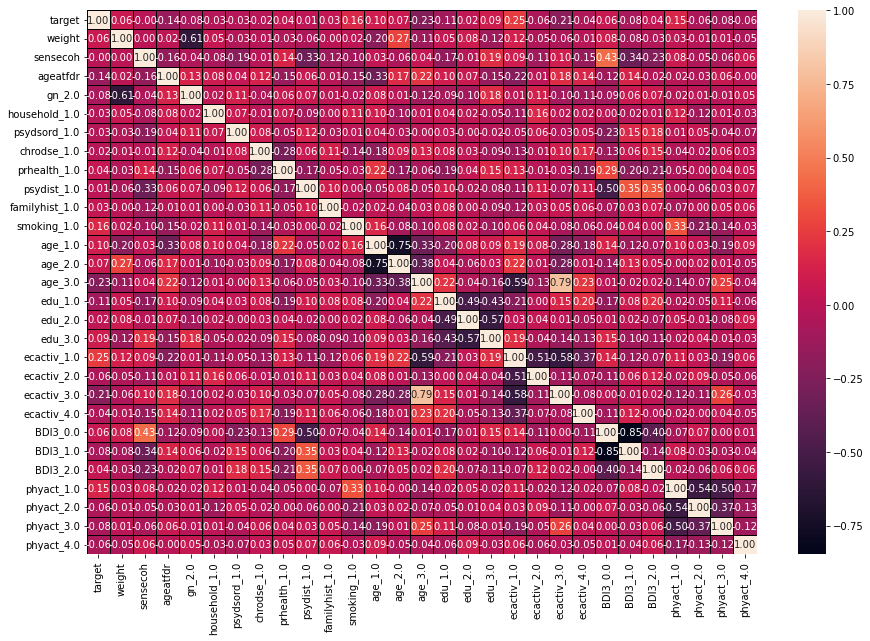

In [53]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(imputed_knn.corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

Since we have too many variables, graph is not helpfull to find out correlated variables. Then we can create a list to analyse the correlated variables. 

In [54]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(imputed_knn, 15))

Top Absolute Correlations
BDI3_0.0     BDI3_1.0       0.846389
age_3.0      ecactiv_3.0    0.794007
age_1.0      age_2.0        0.749758
weight       gn_2.0         0.606577
age_3.0      ecactiv_1.0    0.586868
ecactiv_1.0  ecactiv_3.0    0.581954
edu_2.0      edu_3.0        0.572168
phyact_1.0   phyact_2.0     0.543775
ecactiv_1.0  ecactiv_2.0    0.509113
psydist_1.0  BDI3_0.0       0.503045
phyact_1.0   phyact_3.0     0.495029
edu_1.0      edu_2.0        0.485893
             edu_3.0        0.426285
sensecoh     BDI3_0.0       0.426048
BDI3_0.0     BDI3_2.0       0.400222
dtype: float64


It seems that responses of two categorical variables are correlated but this this an expected situation since they are the part of the same questions. 

# Final chi-square test

In [55]:
from sklearn.feature_selection import chi2
X = imputed_knn.drop('target',axis=1)
y = imputed_knn['target']

chi_scores = chi2(X,y)

In [56]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

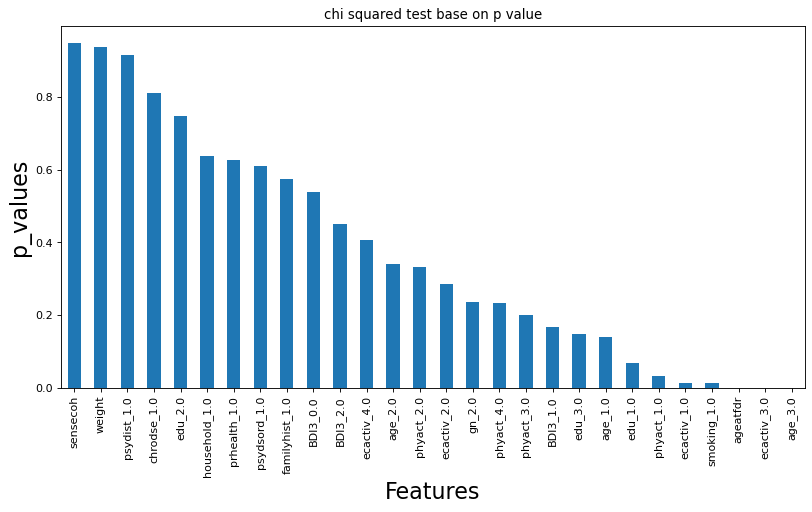

In [57]:


from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)


p_values.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [58]:
p_values

sensecoh          0.949099
weight            0.936975
psydist_1.0       0.914124
chrodse_1.0       0.809949
edu_2.0           0.747140
household_1.0     0.637446
prhealth_1.0      0.627096
psydsord_1.0      0.610789
familyhist_1.0    0.573315
BDI3_0.0          0.538117
BDI3_2.0          0.452045
ecactiv_4.0       0.405720
age_2.0           0.341578
phyact_2.0        0.331665
ecactiv_2.0       0.285638
gn_2.0            0.236212
phyact_4.0        0.234249
phyact_3.0        0.199521
BDI3_1.0          0.166102
edu_3.0           0.146883
age_1.0           0.141170
edu_1.0           0.067889
phyact_1.0        0.031769
ecactiv_1.0       0.013182
smoking_1.0       0.012388
ageatfdr          0.000991
ecactiv_3.0       0.000122
age_3.0           0.000031
dtype: float64